In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import umap

In [4]:
digits = load_digits()
X = digits.data  # The image data (64 features per image)
y = digits.target # The digit each image represents

print(f"Original data shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")



Original data shape: (1797, 64)
Number of classes: 10


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (1437, 64)
Testing data shape: (360, 64)


In [9]:
reducer = umap.UMAP(n_neighbors=15, # Affects local vs global structure preservation
                    min_dist=0.1, # Controls how tightly points are clustered
                    n_components=2, # The number of dimensions to reduce to
                    random_state=42)

In [10]:
X_train_umap = reducer.fit_transform(X_train)
X_test_umap = reducer.transform(X_test) # Use the fitted reducer to transform test data

print(f"UMAP transformed training data shape: {X_train_umap.shape}")
print(f"UMAP transformed testing data shape: {X_test_umap.shape}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


UMAP transformed training data shape: (1437, 2)
UMAP transformed testing data shape: (360, 2)


In [11]:
knn = KNeighborsClassifier(n_neighbors=5)

In [12]:
knn.fit(X_train_umap, y_train)



KNeighborsClassifier()

In [13]:
y_pred = knn.predict(X_test_umap)



In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of KNN on UMAP-reduced test data: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)]))




Accuracy of KNN on UMAP-reduced test data: 0.9778

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.90      1.00      0.95        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.90      0.95        30
           9       0.95      0.95      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



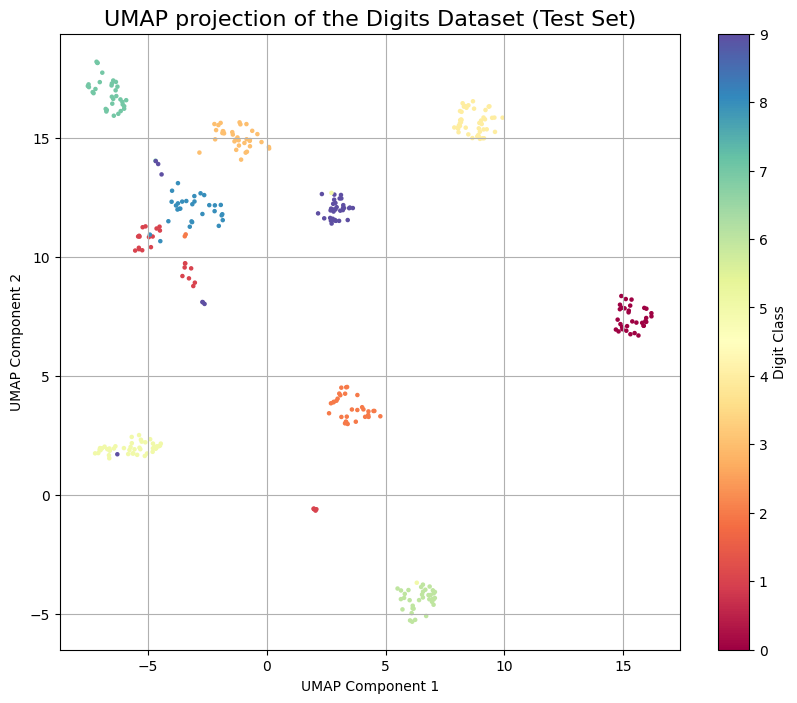

In [15]:
# Plot the 2D UMAP embedding of the test data, colored by their true labels

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_test_umap[:, 0], X_test_umap[:, 1], c=y_test, cmap='Spectral', s=5)
plt.title('UMAP projection of the Digits Dataset (Test Set)', fontsize=16)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(scatter, label='Digit Class')
plt.grid(True)
plt.show()



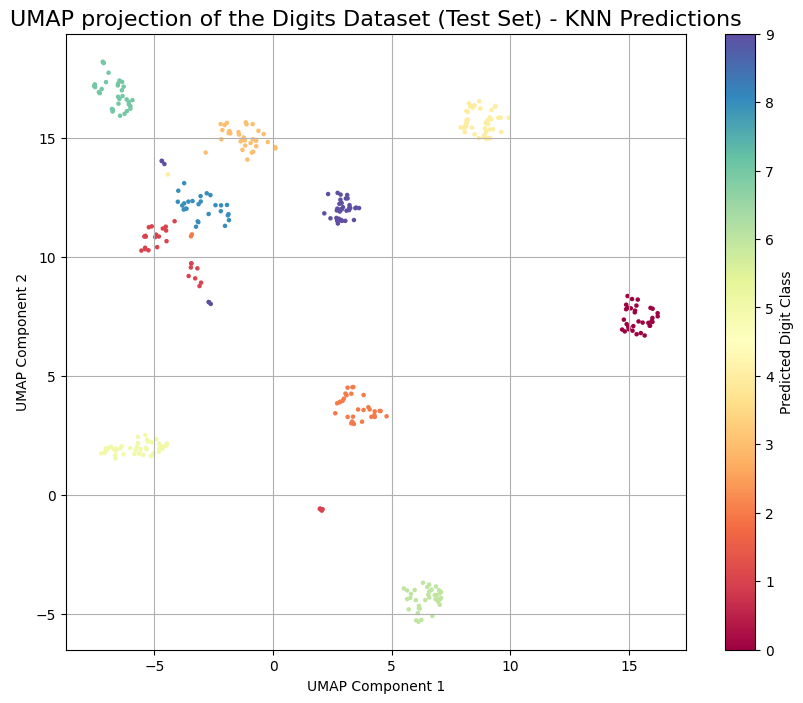

In [16]:
# shows how the KNN classifier made its predictions in the UMAP space

plt.figure(figsize=(10, 8))
scatter_pred = plt.scatter(X_test_umap[:, 0], X_test_umap[:, 1], c=y_pred, cmap='Spectral', s=5)
plt.title('UMAP projection of the Digits Dataset (Test Set) - KNN Predictions', fontsize=16)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(scatter_pred, label='Predicted Digit Class')
plt.grid(True)
plt.show()